In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Load the datasets
fake_news = pd.read_csv('Fake.csv')  # Path to your Fake.csv
true_news = pd.read_csv('True.csv')  # Path to your True.csv

# Check the first few rows of the datasets
fake_news.head(), true_news.head()


(                                               title  \
 0   Donald Trump Sends Out Embarrassing New Year’...   
 1   Drunk Bragging Trump Staffer Started Russian ...   
 2   Sheriff David Clarke Becomes An Internet Joke...   
 3   Trump Is So Obsessed He Even Has Obama’s Name...   
 4   Pope Francis Just Called Out Donald Trump Dur...   
 
                                                 text subject  \
 0  Donald Trump just couldn t wish all Americans ...    News   
 1  House Intelligence Committee Chairman Devin Nu...    News   
 2  On Friday, it was revealed that former Milwauk...    News   
 3  On Christmas day, Donald Trump announced that ...    News   
 4  Pope Francis used his annual Christmas Day mes...    News   
 
                 date  
 0  December 31, 2017  
 1  December 31, 2017  
 2  December 30, 2017  
 3  December 29, 2017  
 4  December 25, 2017  ,
                                                title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U

In [3]:
# Add 'label' column
fake_news['label'] = 0  # 0 for fake news
true_news['label'] = 1  # 1 for real news

# Merge both datasets
df = pd.concat([fake_news[['text', 'label']], true_news[['text', 'label']]], axis=0)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows
df.head()


,text,label
0,"21st Century Wire says Ben Stein, reputable pr...",0
1,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,"On Monday, Donald Trump once again embarrassed...",0
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1


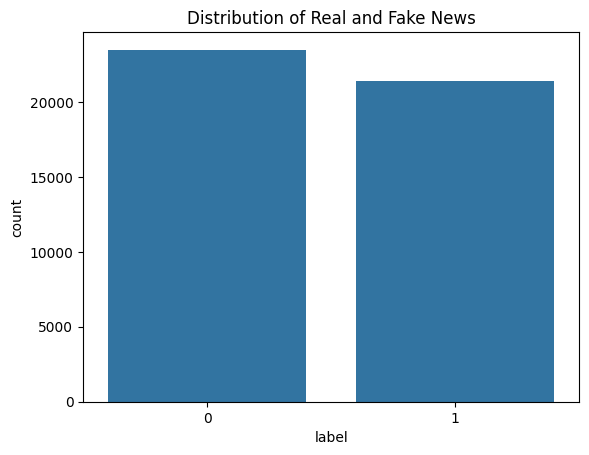

In [4]:
# Check for missing values
df.isnull().sum()

# Basic statistics
df.describe()

# Distribution of labels
sns.countplot(x='label', data=df)
plt.title('Distribution of Real and Fake News')
plt.show()


In [5]:
# Function to clean the text
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Clean the 'text' column
df['text'] = df['text'].apply(clean_text)

# Check the cleaned data
df.head()


,text,label
0,21st century wire says ben stein reputable pro...,0
1,washington reuters us president donald trump ...,1
2,reuters puerto rico governor ricardo rossello...,1
3,on monday donald trump once again embarrassed ...,0
4,glasgow scotland reuters most us presidential...,1


In [6]:
# TF-IDF Vectorizer for text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Transform the text data
X = vectorizer.fit_transform(df['text']).toarray()

# Target variable
y = df['label']


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1 Score: {f1_lr:.4f}")


Logistic Regression - Accuracy: 0.9866, Precision: 0.9817, Recall: 0.9904, F1 Score: 0.9860


In [9]:
# Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print(f"Naive Bayes - Accuracy: {accuracy_nb:.4f}, Precision: {precision_nb:.4f}, Recall: {recall_nb:.4f}, F1 Score: {f1_nb:.4f}")


Naive Bayes - Accuracy: 0.9202, Precision: 0.9049, Recall: 0.9297, F1 Score: 0.9172


In [10]:
# KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"KNN - Accuracy: {accuracy_knn:.4f}, Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, F1 Score: {f1_knn:.4f}")


KNN - Accuracy: 0.6951, Precision: 0.9392, Recall: 0.3836, F1 Score: 0.5447


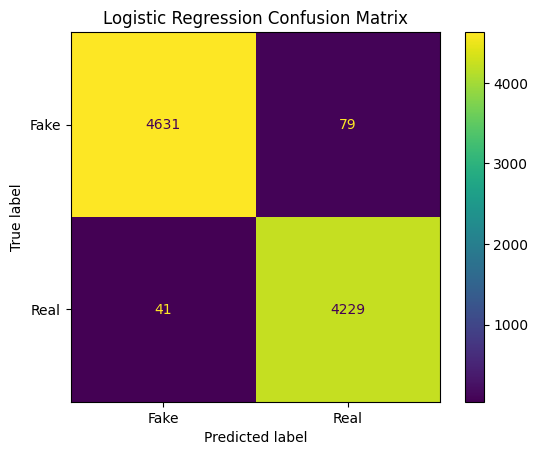

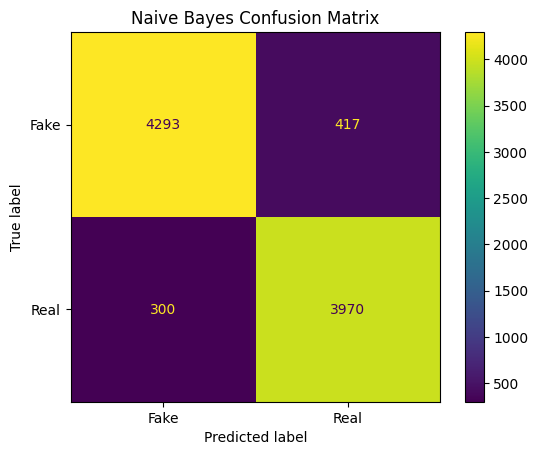

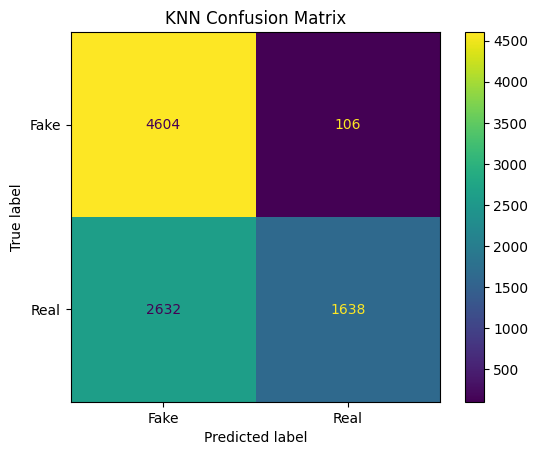

In [11]:
# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr_display = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Fake', 'Real'])
cm_lr_display.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Naive Bayes Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb_display = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Fake', 'Real'])
cm_nb_display.plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn_display = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Fake', 'Real'])
cm_knn_display.plot()
plt.title("KNN Confusion Matrix")
plt.show()


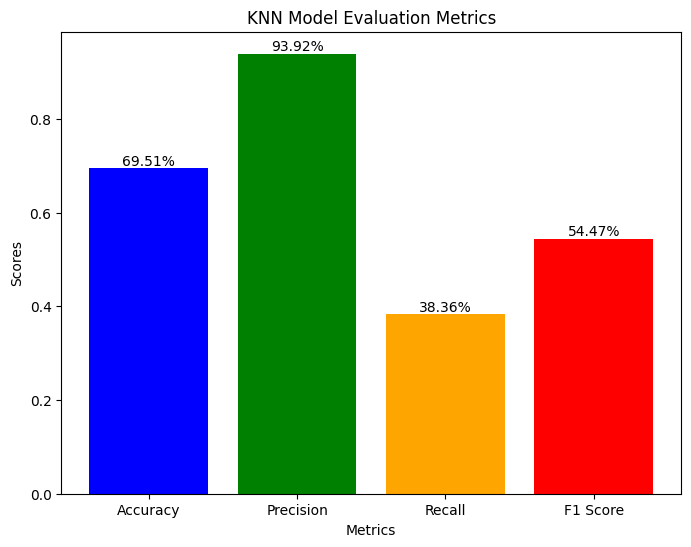

In [12]:

import matplotlib.pyplot as plt

# KNN model evaluation metrics
metrics_knn = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1 Score': f1_knn
}

# Plotting the evaluation metrics
plt.figure(figsize=(8, 6))

# Create a bar plot
bars = plt.bar(metrics_knn.keys(), metrics_knn.values(), color=['blue', 'green', 'orange', 'red'])

# Add title and labels
plt.title('KNN Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')

# Display percentage values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval*100:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Hyperparameter search space (reduced)
param_grid_lr = {
    'C': [0.1, 1.0],  # Reduced search space
    'penalty': ['l2'],  # 'l1' is less commonly used and can slow down the computation
    'solver': ['liblinear']  # 'liblinear' is faster for smaller datasets
}

# GridSearchCV for Logistic Regression with parallel processing (n_jobs=-1)
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model
lr_grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best score for Logistic Regression:", lr_grid_search.best_score_)


Best parameters for Logistic Regression: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for Logistic Regression: 0.9888913504323963


In [14]:
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Hyperparameter search space (reduced range)
param_dist_lr = {
    'C': [0.1, 1.0, 10.0],  # Smaller range of C values
    'penalty': ['l2'],       # Only 'l2' penalty
    'solver': ['liblinear']  # Use only 'liblinear' solver (faster for small models)
}

# RandomizedSearchCV for Logistic Regression with parallel processing
lr_random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=1000),
    param_distributions=param_dist_lr,
    n_iter=3,                 # Reduce the number of random iterations
    scoring='accuracy',
    cv=3,                     # Reduce the number of cross-validation folds
    n_jobs=-1,                # Use all available cores for parallelism
    random_state=42
)

# Fit the model (This can take some time depending on the dataset size)
lr_random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Logistic Regression:", lr_random_search.best_params_)
print("Best score for Logistic Regression:", lr_random_search.best_score_)


Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10.0}
Best score for Logistic Regression: 0.9927056079802825


Top 10 Important Words based on TF-IDF scores:
trump        0.057645
said         0.047850
president    0.025458
people       0.020817
clinton      0.019481
obama        0.017980
state        0.017893
house        0.017882
reuters      0.017752
donald       0.016642
dtype: float64


<ipython-input-15-93520bbc7a89>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Keyword', y='Fake News Count', data=fake_keywords_df, palette='Reds')


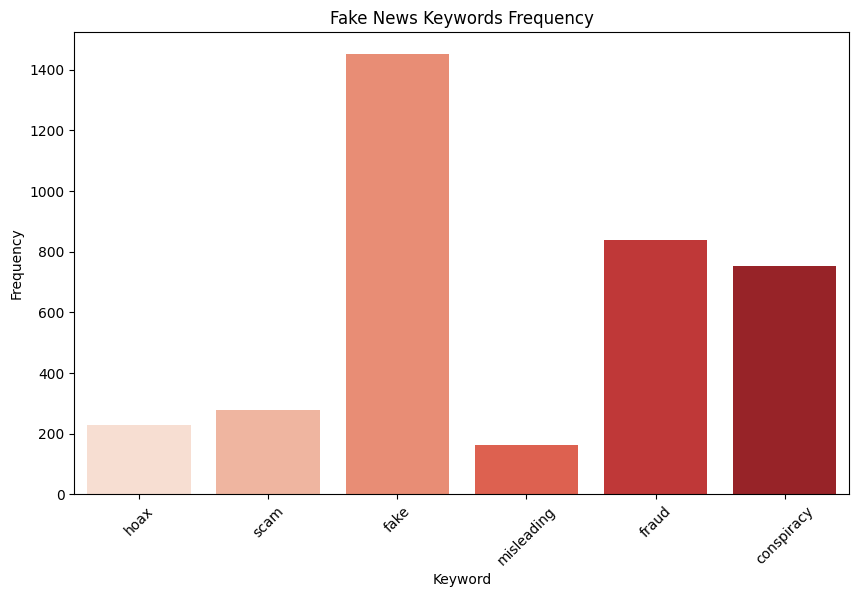

<ipython-input-15-93520bbc7a89>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Keyword', y='Real News Count', data=real_keywords_df, palette='Blues')


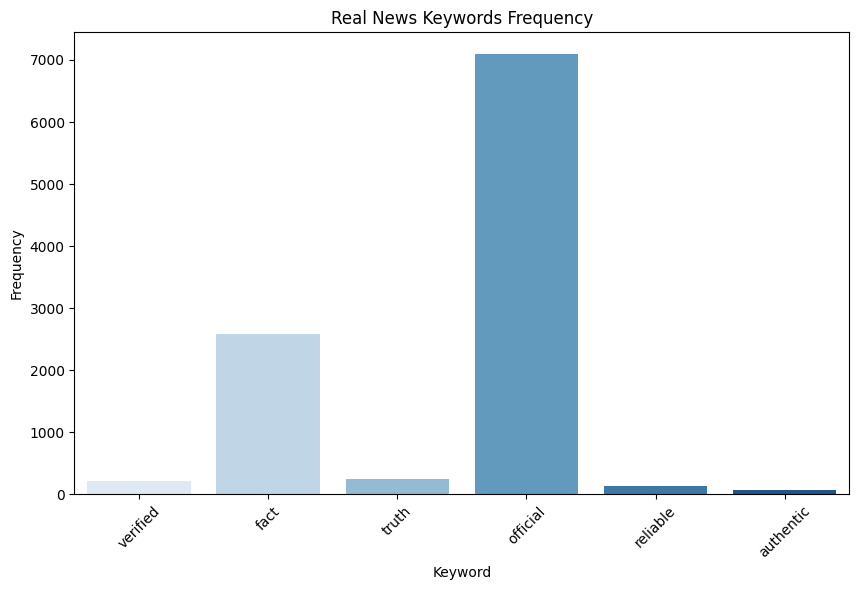

<ipython-input-15-93520bbc7a89>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


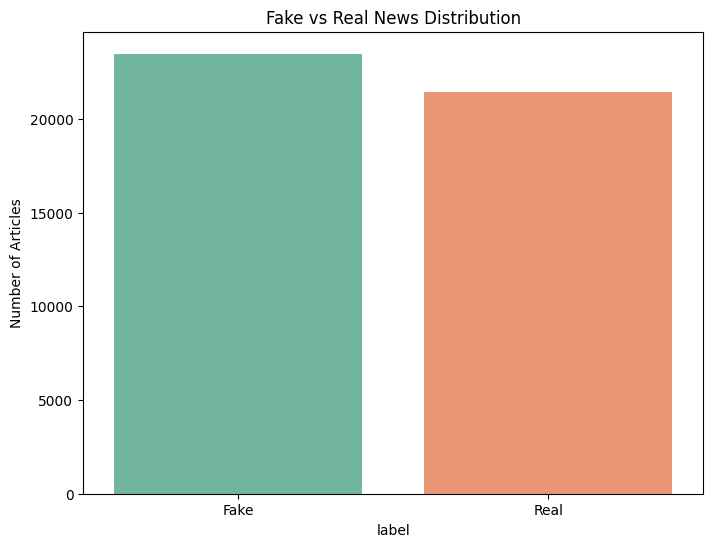

In [15]:
# #TF-IDF Features: Show the most important words (features) based on TF-IDF scores
tfidf_scores = pd.DataFrame(X.T, index=vectorizer.get_feature_names_out(), columns=df['label']) # Remove .toarray() since X is already a dense array
tfidf_scores = tfidf_scores.mean(axis=1).sort_values(ascending=False)

# Display the top 10 words with the highest average TF-IDF score (indicative of importance)
print("Top 10 Important Words based on TF-IDF scores:")
print(tfidf_scores.head(10))

# -- Fake vs Real News Keyword Analysis --
# List of potential words/phrases that might indicate fake or real news
fake_keywords = ['hoax', 'scam', 'fake', 'misleading', 'fraud', 'conspiracy']
real_keywords = ['verified', 'fact', 'truth', 'official', 'reliable', 'authentic']

# Count the occurrence of these keywords in the fake and real news
fake_keywords_count = {}
real_keywords_count = {}
# Clean the 'text' column and save it to a new column 'cleaned_text'
df['cleaned_text'] = df['text'].apply(clean_text)


# Count occurrences in fake news
for keyword in fake_keywords:
    fake_keywords_count[keyword] = df[df['label'] == 0]['cleaned_text'].str.contains(keyword).sum()

# Count occurrences in real news
for keyword in real_keywords:
    real_keywords_count[keyword] = df[df['label'] == 1]['cleaned_text'].str.contains(keyword).sum()
# Count occurrences in fake news
for keyword in fake_keywords:
    fake_keywords_count[keyword] = df[df['label'] == 0]['cleaned_text'].str.contains(keyword).sum()

# Count occurrences in real news
for keyword in real_keywords:
    real_keywords_count[keyword] = df[df['label'] == 1]['cleaned_text'].str.contains(keyword).sum()

# Display the results in a DataFrame for better visualization
fake_keywords_df = pd.DataFrame(list(fake_keywords_count.items()), columns=['Keyword', 'Fake News Count'])
real_keywords_df = pd.DataFrame(list(real_keywords_count.items()), columns=['Keyword', 'Real News Count'])

# Plot Fake News Keywords
plt.figure(figsize=(10, 6))
sns.barplot(x='Keyword', y='Fake News Count', data=fake_keywords_df, palette='Reds')
plt.title('Fake News Keywords Frequency')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

# Plot Real News Keywords
plt.figure(figsize=(10, 6))
sns.barplot(x='Keyword', y='Real News Count', data=real_keywords_df, palette='Blues')
plt.title('Real News Keywords Frequency')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

# -- Distribution of Fake and Real News --
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Fake vs Real News Distribution')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.ylabel('Number of Articles')
plt.show()

